In [1]:
'''
统计分析
统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析
集中趋势度量 / 离中趋势度量

'''

'\n统计分析\n统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析\n集中趋势度量 / 离中趋势度量\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表或中心值——统计平均数
# 算数平均数、位置平均数
# （1） 算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                     'f':np.random.rand(100)})

data['f'] = data['f']/data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('---------')
    # 创建数据
    
mean = data['value'].mean()
print('简单算术平均值为：%.2f' %mean)
    # 简单算术平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value']*data['f']).sum()/ data['f'].sum()
print('加权算术平均值为：%.2f' % mean_w)
    # 加权算术平均值 =（x1f1 + x2f2 + ... + xnfn） / （f1 + f2 + ....+ fn）


   value         f
0    102  0.012338
1    106  0.007459
2    112  0.010952
3    107  0.001089
4    109  0.013280
---------
简单算术平均值为：109.70
加权算术平均值为：109.65


在这里强调一下 kind参数——'line', 'bar', 'barh', 'kde':

直方图：是一种可以对值频率离散化显示的柱状图。通过调用Series.hist()方法即可创建。

密度图：与直方图相关的一种类型图，是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的，通过给plot传入参数kind = 'kde' 即可。

散布图：是观测两个一维数据序列之间关系的有效手段，使用pd.scatter_matrix()即可建立。


众数为 [117]
中位数为110


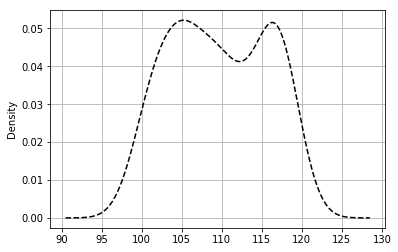

In [23]:
# 1、集中趋势度量
# （2）位置平均数

m = data['value'].mode()
print('众数为',m.tolist())
    # 众数是一组数据中出现次数最多的数，这里可能返回多个值。

med = data['value'].median()
print('中位数为%i'%med)
    # 中位数指将总体各单位标志按照大小顺序排序后，中间位置的数字
    
data['value'].plot(kind='kde',style='--k',grid =True)
    # 密度曲线

#下面部分报错，暂时不写；


In [25]:
# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位数、方差与标准差、离散系数

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
    # 创建数据
    # A/B 销售额量级在同一水平

                A_sale      B_sale
2017-06-01  981.859562  127.539497
2017-06-02  362.532916  982.078752
2017-06-03  372.500120  693.997195
2017-06-04  258.156458  639.228938
2017-06-05  236.372199  841.417463


A销售额的极差是：955.92,B销售额的极差是：966.09
--------------------------------------------------------------
count     30.000000
mean     526.959818
std      260.513798
min       25.936048
25%      323.591892
50%      511.456123
75%      729.034997
max      981.859562
Name: A_sale, dtype: float64 count     30.000000
mean     542.429176
std      307.262110
min       15.987345
25%      283.129295
50%      595.485468
75%      815.440584
max      982.078752
Name: B_sale, dtype: float64
A销售额的分位差为：405.44,B销售额的分位差为：532.31。
------------------------------------------------------------------


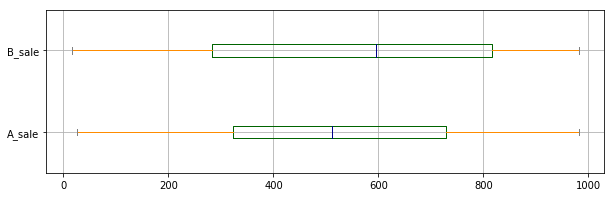

In [38]:
# （1）极差、分位差

a_r = data['A_sale'].max() -data['A_sale'].min()
b_r = data['B_sale'].max() -data['B_sale'].min()
print('A销售额的极差是：%.2f,B销售额的极差是：%.2f'%(a_r,b_r))
 # 极差
 # 没有考虑中间变量的变动，测定离中趋势不稳定
print('--------------------------------------------------------------')
sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
print(sta,stb)

a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f,B销售额的分位差为：%.2f。'%(a_iqr,b_iqr))
  # 分位差
print('------------------------------------------------------------------')

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid=True,  color=color,  figsize=(10,3))
    #箱型图

In [45]:
#(2) 方差与标准差
 
a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f, B销售额的标准差为：%.2f' % (a_std,b_std))
print('A销售额的方差为：%.2f, B销售额的方差为：%.2f' % (a_var,b_var))
# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显

#下面密度图线报错

A销售额的标准差为：260.51, B销售额的标准差为：307.26
A销售额的方差为：67867.44, B销售额的方差为：94410.00
